### Import libraries

In [1]:
import torch
import warnings
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import albumentations as A

from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from datasets.gta5 import GTA5
from datasets.cityscapes import CityScapes
from torchvision.transforms import ToPILImage
from torchvision import transforms

from utils import fast_hist, per_class_iou
from models.bisenet.build_bisenet import BiSeNet

warnings.filterwarnings("ignore")

### Training - Augementation 1

In [3]:
device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)

# Set model to training mode
model.train()

# Define the custom transform to augment the data
custom_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.5),
])

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5', custom_transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5_aug_1.pth')

100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 0, Loss: 0.7006178498268127, mIoU: 0.20909362577216767


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 1, Loss: 0.39654240012168884, mIoU: 0.30432243861307595


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 2, Loss: 0.31940048933029175, mIoU: 0.35007018102346166


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 3, Loss: 0.28012973070144653, mIoU: 0.3827121546518778


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 4, Loss: 0.5709856748580933, mIoU: 0.4057775147232185


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 5, Loss: 0.2024514228105545, mIoU: 0.41928901028216603


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 6, Loss: 0.2363322526216507, mIoU: 0.4323880479315147


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 7, Loss: 0.2109125554561615, mIoU: 0.44071156566912156


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 8, Loss: 0.2722752094268799, mIoU: 0.4522685444464048


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 9, Loss: 0.20631945133209229, mIoU: 0.4610309977598522


100%|██████████| 313/313 [02:21<00:00,  2.20it/s]


Epoch: 10, Loss: 0.25483986735343933, mIoU: 0.46717359131782704


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 11, Loss: 0.21834705770015717, mIoU: 0.4772450177112665


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 12, Loss: 0.21944156289100647, mIoU: 0.4851198330120313


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 13, Loss: 0.2297864556312561, mIoU: 0.48915202096807137


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 14, Loss: 0.1887751817703247, mIoU: 0.4978433711715285


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 15, Loss: 0.2830430865287781, mIoU: 0.49789601007653755


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 16, Loss: 0.2815718352794647, mIoU: 0.5034569043678573


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 17, Loss: 0.22933101654052734, mIoU: 0.5105377589727368


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 18, Loss: 0.20627668499946594, mIoU: 0.518623927226496


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 19, Loss: 0.15249700844287872, mIoU: 0.5238318768647477


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 20, Loss: 0.16586551070213318, mIoU: 0.5317152676294489


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 21, Loss: 0.1594497412443161, mIoU: 0.5390695902485046


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 22, Loss: 0.1769586056470871, mIoU: 0.5420586679547663


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 23, Loss: 0.14470311999320984, mIoU: 0.5473005720669079


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 24, Loss: 0.20987975597381592, mIoU: 0.5529602752582671


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 25, Loss: 0.1957828849554062, mIoU: 0.5594704775564231


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 26, Loss: 0.20172350108623505, mIoU: 0.5623865530657395


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 27, Loss: 0.15741066634655, mIoU: 0.5667212679910678


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 28, Loss: 0.18005335330963135, mIoU: 0.5702825822461821


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 29, Loss: 0.17107313871383667, mIoU: 0.5748896304340612


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 30, Loss: 0.1558949053287506, mIoU: 0.5781617251703609


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 31, Loss: 0.1497252881526947, mIoU: 0.5804248669880965


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 32, Loss: 0.20172154903411865, mIoU: 0.5826719536243496


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 33, Loss: 0.16980880498886108, mIoU: 0.5848840765341745


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 34, Loss: 0.15224875509738922, mIoU: 0.5912241995494151


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 35, Loss: 0.15015654265880585, mIoU: 0.5911628613514017


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 36, Loss: 0.17482499778270721, mIoU: 0.595653998459873


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 37, Loss: 0.1689203977584839, mIoU: 0.598466927818405


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 38, Loss: 0.16892679035663605, mIoU: 0.600011640213094


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 39, Loss: 0.17122213542461395, mIoU: 0.6036874655821513


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 40, Loss: 0.17726700007915497, mIoU: 0.6039443886872454


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 41, Loss: 0.1270970106124878, mIoU: 0.6058982576034067


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 42, Loss: 0.14600643515586853, mIoU: 0.6090290794882669


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 43, Loss: 0.189254492521286, mIoU: 0.6133644429600897


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 44, Loss: 0.1501007378101349, mIoU: 0.6125204383891194


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 45, Loss: 0.21742862462997437, mIoU: 0.6132994105667136


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 46, Loss: 0.1908818930387497, mIoU: 0.616131602250493


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 47, Loss: 0.1318473517894745, mIoU: 0.6170519749418201


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 48, Loss: 0.18111446499824524, mIoU: 0.6204329866069771


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]

Epoch: 49, Loss: 0.19032782316207886, mIoU: 0.6228556339690697


### Training - Augementation 2

In [4]:
torch.cuda.empty_cache()

device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)

# Set model to training mode
model.train()

# Define the custom transform to augment the data
custom_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomCrop(width=256, height=256, p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)
])

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5', custom_transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model

torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5_aug_2.pth')

100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 0, Loss: 0.5092978477478027, mIoU: 0.15586839728232982


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 1, Loss: 0.7154426574707031, mIoU: 0.2200586103690767


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 2, Loss: 0.2517665922641754, mIoU: 0.25095406073428683


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 3, Loss: 0.4912794232368469, mIoU: 0.268747751326596


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 4, Loss: 0.24323412775993347, mIoU: 0.27612752955885095


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 5, Loss: 0.23519916832447052, mIoU: 0.29605495132503906


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 6, Loss: 1.6304510831832886, mIoU: 0.30894305853181453


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 7, Loss: 0.7593958377838135, mIoU: 0.32601936123688846


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 8, Loss: 0.19203662872314453, mIoU: 0.33907065363331146


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 9, Loss: 0.334437757730484, mIoU: 0.3376986064748808


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 10, Loss: 0.2250899076461792, mIoU: 0.35262979700881825


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 11, Loss: 0.5115485787391663, mIoU: 0.3556404319639171


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 12, Loss: 0.18719275295734406, mIoU: 0.3627383041702525


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 13, Loss: 0.2590475082397461, mIoU: 0.3800171277161992


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 14, Loss: 0.19106291234493256, mIoU: 0.3917307803836949


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 15, Loss: 0.34898075461387634, mIoU: 0.3801183831963709


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 16, Loss: 0.4458761215209961, mIoU: 0.3876189691367621


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 17, Loss: 0.23999528586864471, mIoU: 0.39760048045703433


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 18, Loss: 0.3282420337200165, mIoU: 0.40802741024052647


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 19, Loss: 0.3510570228099823, mIoU: 0.4127158018343218


100%|██████████| 313/313 [02:07<00:00,  2.46it/s]


Epoch: 20, Loss: 0.13463693857192993, mIoU: 0.4035489334280278


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 21, Loss: 0.22374393045902252, mIoU: 0.4227498723252948


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 22, Loss: 0.2375614047050476, mIoU: 0.43001412883157064


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 23, Loss: 0.18465198576450348, mIoU: 0.4253536188414448


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 24, Loss: 0.27113252878189087, mIoU: 0.4415975479837189


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 25, Loss: 0.3717960715293884, mIoU: 0.42621512009521245


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 26, Loss: 0.30540725588798523, mIoU: 0.45679640850761455


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 27, Loss: 0.14224188029766083, mIoU: 0.4467847331271117


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 28, Loss: 0.27805131673812866, mIoU: 0.43990863824070514


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 29, Loss: 0.2442733198404312, mIoU: 0.44351953951953055


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 30, Loss: 0.33193346858024597, mIoU: 0.4511199399007624


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 31, Loss: 0.1235935240983963, mIoU: 0.45913548088951933


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 32, Loss: 0.31681716442108154, mIoU: 0.46366341018018364


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 33, Loss: 0.13887855410575867, mIoU: 0.45689679385104537


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 34, Loss: 0.3170698881149292, mIoU: 0.4639331730410648


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 35, Loss: 0.2724490761756897, mIoU: 0.4623892248424974


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 36, Loss: 0.12143919616937637, mIoU: 0.4566670291626502


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 37, Loss: 0.23736490309238434, mIoU: 0.46352614461262315


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 38, Loss: 0.11761137843132019, mIoU: 0.46979424251384766


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 39, Loss: 0.3971511423587799, mIoU: 0.47517158357933076


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 40, Loss: 0.4775472581386566, mIoU: 0.4729642610115727


100%|██████████| 313/313 [02:09<00:00,  2.43it/s]


Epoch: 41, Loss: 0.4232763648033142, mIoU: 0.47055109308793897


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 42, Loss: 0.2056359499692917, mIoU: 0.4681994709595133


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 43, Loss: 0.2856404483318329, mIoU: 0.47892859649214653


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 44, Loss: 0.7580386400222778, mIoU: 0.4791719667719459


100%|██████████| 313/313 [02:07<00:00,  2.45it/s]


Epoch: 45, Loss: 0.24016018211841583, mIoU: 0.4902661976976972


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 46, Loss: 0.1607225388288498, mIoU: 0.4974912066266117


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 47, Loss: 0.6772555112838745, mIoU: 0.4876808063701469


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 48, Loss: 0.2092188149690628, mIoU: 0.4953348872645634


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]

Epoch: 49, Loss: 0.14497999846935272, mIoU: 0.49291604256245686


### Training - Augementation 3 (1+2)

In [5]:
torch.cuda.empty_cache()

device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)

# Set model to training mode
model.train()

# Define the custom transform to augment the data
custom_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.5),
    A.RandomCrop(width=256, height=256, p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5)
])

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5', custom_transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5_aug_3.pth')

100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 0, Loss: 0.5420786142349243, mIoU: 0.1462530942554061


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 1, Loss: 0.40380996465682983, mIoU: 0.2049273764612158


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 2, Loss: 0.5277866721153259, mIoU: 0.22160976844527394


100%|██████████| 313/313 [02:09<00:00,  2.43it/s]


Epoch: 3, Loss: 0.84261155128479, mIoU: 0.23970721274991025


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 4, Loss: 0.7561421990394592, mIoU: 0.2565511566708773


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 5, Loss: 0.38799384236335754, mIoU: 0.271149271414514


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 6, Loss: 0.660023033618927, mIoU: 0.27975165222993087


100%|██████████| 313/313 [02:10<00:00,  2.41it/s]


Epoch: 7, Loss: 0.3683261573314667, mIoU: 0.2841294765283087


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 8, Loss: 0.35752224922180176, mIoU: 0.30110312761407904


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 9, Loss: 1.949611783027649, mIoU: 0.3047169737722831


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 10, Loss: 0.6455805897712708, mIoU: 0.3148724797657302


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 11, Loss: 0.3862275183200836, mIoU: 0.32450430959864246


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 12, Loss: 0.5389944911003113, mIoU: 0.33993099583918207


100%|██████████| 313/313 [02:10<00:00,  2.40it/s]


Epoch: 13, Loss: 0.263641357421875, mIoU: 0.34824266452347596


100%|██████████| 313/313 [02:08<00:00,  2.43it/s]


Epoch: 14, Loss: 0.19680693745613098, mIoU: 0.3384082927399241


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 15, Loss: 0.2921288311481476, mIoU: 0.3426740549622788


100%|██████████| 313/313 [02:09<00:00,  2.41it/s]


Epoch: 16, Loss: 1.4544275999069214, mIoU: 0.3528765768744668


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 17, Loss: 0.7502127885818481, mIoU: 0.35488146975741164


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 18, Loss: 0.24254149198532104, mIoU: 0.36676778633374435


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 19, Loss: 1.0056511163711548, mIoU: 0.36542617193902666


100%|██████████| 313/313 [02:09<00:00,  2.42it/s]


Epoch: 20, Loss: 0.7236413955688477, mIoU: 0.36399466357557914


100%|██████████| 313/313 [02:08<00:00,  2.44it/s]


Epoch: 21, Loss: 0.22594287991523743, mIoU: 0.3715354859187483


100%|██████████| 313/313 [02:09<00:00,  2.43it/s]


Epoch: 22, Loss: 0.6158989071846008, mIoU: 0.37857102400317477


100%|██████████| 313/313 [02:12<00:00,  2.36it/s]


Epoch: 23, Loss: 0.5818772315979004, mIoU: 0.37462105483244007


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 24, Loss: 0.21953053772449493, mIoU: 0.3906848364399561


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 25, Loss: 0.2623324990272522, mIoU: 0.38117007094442956


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 26, Loss: 0.5437989830970764, mIoU: 0.3882330345043763


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 27, Loss: 0.26943275332450867, mIoU: 0.3951408279940954


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 28, Loss: 0.37886351346969604, mIoU: 0.3901274652948474


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 29, Loss: 0.14419469237327576, mIoU: 0.3964820300109215


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 30, Loss: 0.21260574460029602, mIoU: 0.4064500465544401


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 31, Loss: 0.688346803188324, mIoU: 0.40485690424557336


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 32, Loss: 0.2432725429534912, mIoU: 0.41719075446760157


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 33, Loss: 0.335356205701828, mIoU: 0.4228971526547577


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 34, Loss: 0.5053116679191589, mIoU: 0.42356612498748464


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 35, Loss: 1.3934940099716187, mIoU: 0.4286688483427675


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 36, Loss: 0.4317677319049835, mIoU: 0.4263813568287046


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 37, Loss: 0.21645864844322205, mIoU: 0.42901176225194176


100%|██████████| 313/313 [02:15<00:00,  2.32it/s]


Epoch: 38, Loss: 0.375394731760025, mIoU: 0.44042798965327457


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 39, Loss: 0.34265637397766113, mIoU: 0.4371777387254471


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 40, Loss: 0.2729453146457672, mIoU: 0.42750444962171036


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 41, Loss: 0.27834242582321167, mIoU: 0.42966941039630413


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 42, Loss: 0.2557159662246704, mIoU: 0.4437424033273248


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 43, Loss: 0.3982795178890228, mIoU: 0.428984344054917


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 44, Loss: 0.3450815975666046, mIoU: 0.4364465372707906


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 45, Loss: 0.11378712952136993, mIoU: 0.451560448493024


100%|██████████| 313/313 [02:13<00:00,  2.34it/s]


Epoch: 46, Loss: 0.7683377265930176, mIoU: 0.4450049239339061


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 47, Loss: 0.14194150269031525, mIoU: 0.4449436141793075


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]


Epoch: 48, Loss: 0.2432202845811844, mIoU: 0.44178474119281547


100%|██████████| 313/313 [02:14<00:00,  2.33it/s]

Epoch: 49, Loss: 0.11721567064523697, mIoU: 0.4612882349263952


### Evaluation - GTA 5

0it [00:01, ?it/s]


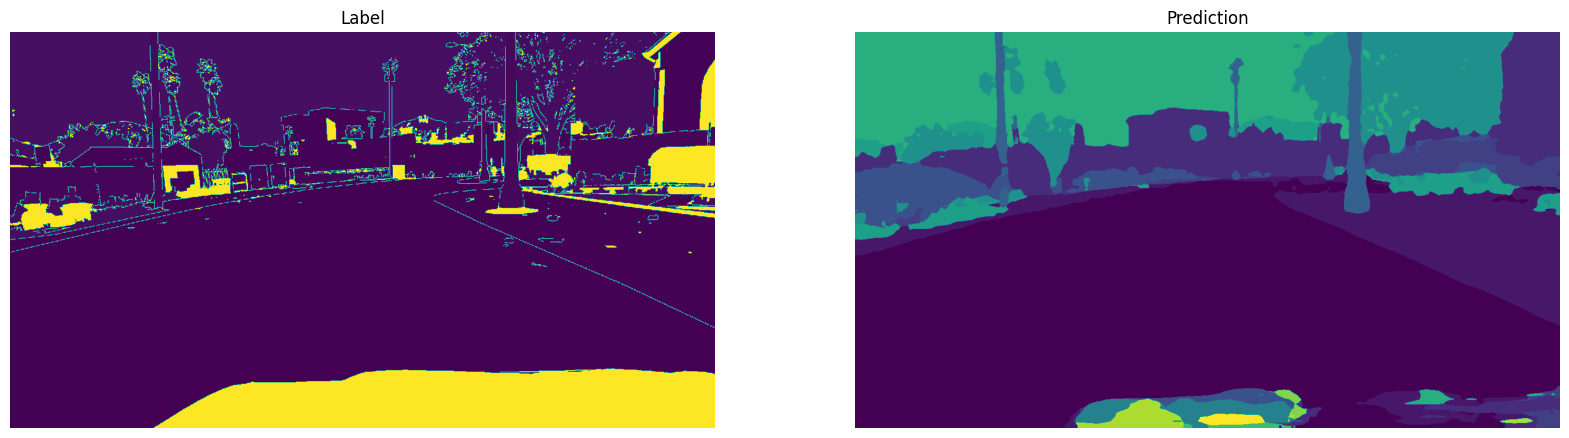

In [3]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_1.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### Evaluation (CityScapes) - Augementation 1

In [3]:
# These are the class labels for the Cityscapes dataset
class_labels = {
    0: 'road',
    1: 'sidewalk',
    2: 'building',
    3: 'wall',
    4: 'fence',
    5: 'pole',
    6: 'traffic light',
    7: 'traffic sign',
    8: 'vegetation',
    9: 'terrain',
    10: 'sky',
    11: 'person',
    12: 'rider',
    13: 'car',
    14: 'truck',
    15: 'bus',
    16: 'train',
    17: 'motorcycle',
    18: 'bicycle'
}

In [4]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_1.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the training split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='train')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 76.69it/s]

Mean IoU: 0.2601 

road IoU: 0.6110
sidewalk IoU: 0.1394
building IoU: 0.6885
wall IoU: 0.1209
fence IoU: 0.1721
pole IoU: 0.1500
traffic light IoU: 0.1065
traffic sign IoU: 0.0492
vegetation IoU: 0.7592
terrain IoU: 0.2283
sky IoU: 0.6502
person IoU: 0.4171
rider IoU: 0.0000
car IoU: 0.3987
truck IoU: 0.1084
bus IoU: 0.0778
train IoU: 0.1351
motorcycle IoU: 0.1296
bicycle IoU: 0.0000


### Evaluation (CityScapes) - Augementation 2

In [5]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_2.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the training split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='train')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 76.56it/s]

Mean IoU: 0.2464 

road IoU: 0.4927
sidewalk IoU: 0.1643
building IoU: 0.5445
wall IoU: 0.1802
fence IoU: 0.1725
pole IoU: 0.1259
traffic light IoU: 0.0867
traffic sign IoU: 0.0603
vegetation IoU: 0.7581
terrain IoU: 0.2578
sky IoU: 0.7441
person IoU: 0.3888
rider IoU: 0.0000
car IoU: 0.5660
truck IoU: 0.0364
bus IoU: 0.1012
train IoU: 0.0019
motorcycle IoU: 0.0000
bicycle IoU: 0.0000


### Evaluation (CityScapes) - Augementation 3

In [6]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_3.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the training split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='train')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 77.44it/s]

Mean IoU: 0.2707 

road IoU: 0.6622
sidewalk IoU: 0.1709
building IoU: 0.6196
wall IoU: 0.1785
fence IoU: 0.1770
pole IoU: 0.1126
traffic light IoU: 0.0157
traffic sign IoU: 0.0390
vegetation IoU: 0.7467
terrain IoU: 0.2876
sky IoU: 0.7234
person IoU: 0.3863
rider IoU: 0.0000
car IoU: 0.6277
truck IoU: 0.0955
bus IoU: 0.0747
train IoU: 0.1446
motorcycle IoU: 0.0820
bicycle IoU: 0.0000


### Example

0it [00:00, ?it/s]


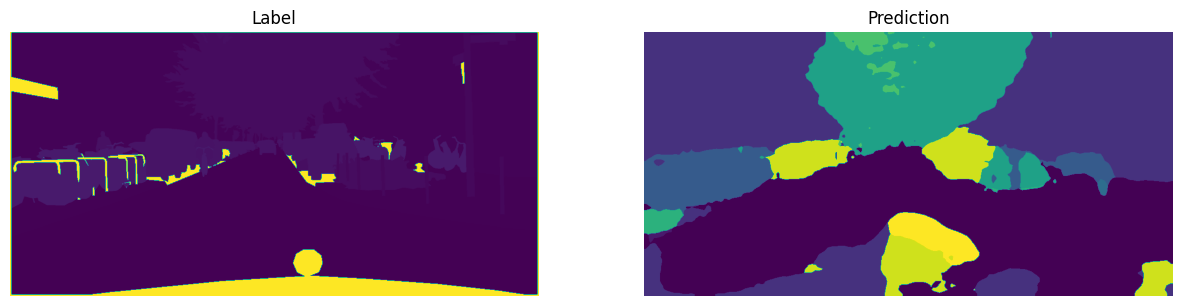

In [13]:
## Inference
# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_aug_3.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()